In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### LOAD DATA VỀ 

Bộ dữ liệu CIFAR10 chứa 60.000 hình ảnh màu trong 10 lớp khác nhau, mỗi lớp có 6.000 hình ảnh. Bộ dữ liệu này được chia thành 50.000 hình ảnh huấn luyện và 10.000 hình ảnh kiểm tra. Các lớp là hoàn toàn phân biệt và không có sự trùng lặp giữa chúng.

In [2]:
(train_img, train_labels), (test_img, test_labels) = datasets.cifar10.load_data()

In [3]:
print(f"train_img shape: {train_img.shape}, train_labels shape: {train_labels.shape}")
print(f"test_img shape: {test_img.shape}, test_labels shape: {test_labels.shape}")

train_img shape: (50000, 32, 32, 3), train_labels shape: (50000, 1)
test_img shape: (10000, 32, 32, 3), test_labels shape: (10000, 1)


50000: Số lượng nhãn tương ứng với các hình ảnh huấn luyện trong bộ dữ liệu. Đây là số lượng hình ảnh trong train_images, và mỗi hình ảnh có một nhãn đi kèm.

1: Mỗi nhãn là một giá trị duy nhất, đại diện cho lớp của hình ảnh.

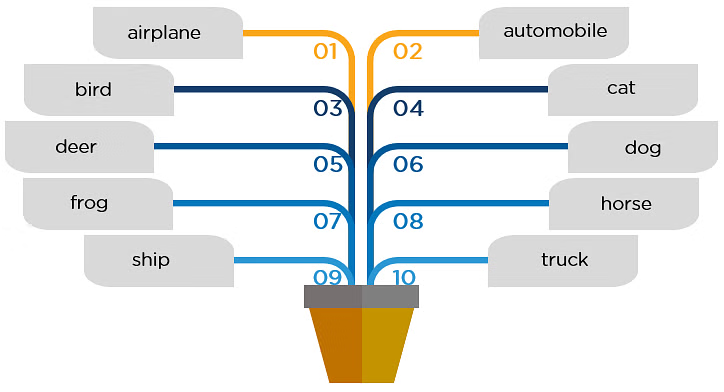

Chuẩn hóa giá trị pixel trong bộ dữ liệu CIFAR10 sao cho giá trị pixel nằm trong khoảng từ 0 đến 1. 

In [4]:
train_img = train_img/255.0
test_img = test_img/255.0

In [5]:
print(train_img[0])
print(train_img[0].shape)

print(train_img[0][0])

print(train_img[0][0][0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


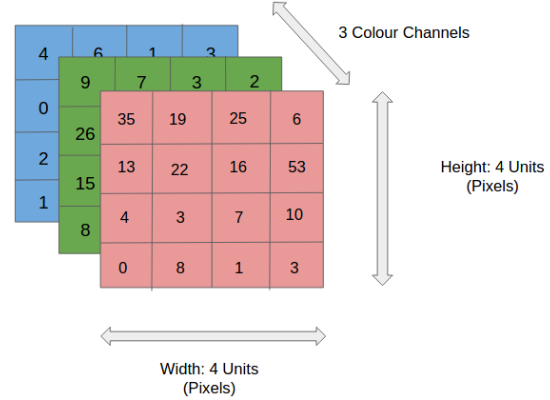

In [6]:
y = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

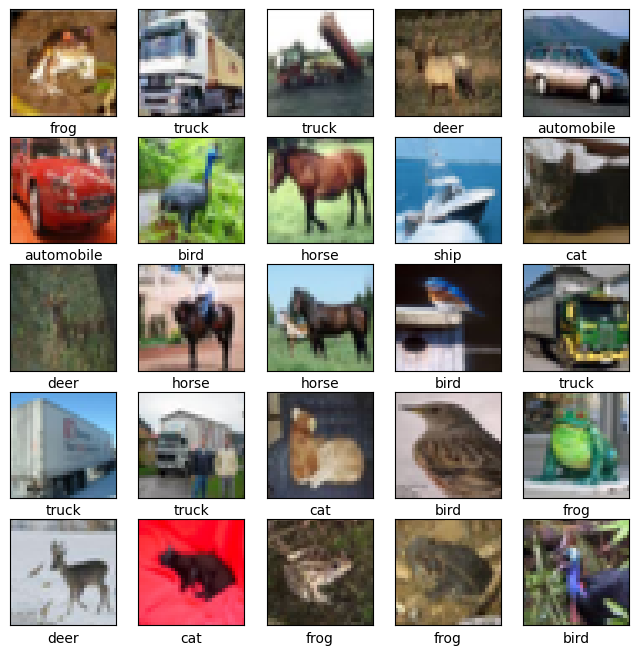

In [7]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(y[train_labels[i][0]])
plt.show()

TẠO LỚP TÍCH CHẬP 

Input: (height, width, color_channels)

In [8]:
# Các lớp sẽ được xếp theo thứ tự tuần tự (một lớp nối tiếp lớp kia)
model = models.Sequential()
# Thêm các lớp tích chập (convolutional layers) và lớp max pooling
# Conv2D là lớp tích chập 2 chiều, với kernel là (3, 3) và hàm kích hoạt là ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Chuyển output 3D tensor (từ các lớp tích chập) thành một vector 1D.

In [10]:
model.add(layers.Flatten())


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

lớp Flatten sẽ chuyển đổi đầu ra của lớp tích chập (3D tensor) thành một vector 1D, ở đây là 1024 chiều (4 * 4 * 64 = 1024).

Thêm lớp fully connected,chuyển nó thành một vector đầu ra có kích thước 64

In [12]:
model.add(layers.Dense(64, activation='relu'))

Lớp này cũng là một lớp fully connected, nhưng với 10 nơ-ron.

Đây là lớp đầu ra của mạng, với 10 nơ-ron tương ứng với 10 lớp trong bài toán phân loại CIFAR-10.

In [13]:
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Chọn hàm mất mát SparseCategoricalCrossentropy cho bài toán phân loại nhiều lớp. from_logits=True cho biết rằng đầu ra của mô hình chưa được chuyển đổi qua hàm softmax.

In [17]:
huan_luyen = model.fit(train_img, train_labels, epochs=10, 
                    validation_data=(test_img, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1886 - loss: 2.1841 - val_accuracy: 0.2998 - val_loss: 1.9140
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3700 - loss: 1.7314 - val_accuracy: 0.4472 - val_loss: 1.5292
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4449 - loss: 1.5208 - val_accuracy: 0.4780 - val_loss: 1.4271
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4955 - loss: 1.4074 - val_accuracy: 0.5176 - val_loss: 1.3313
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5290 - loss: 1.3115 - val_accuracy: 0.5530 - val_loss: 1.2521
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5582 - loss: 1.2392 - val_accuracy: 0.5663 - val_loss: 1.2149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5845 - loss: 1.1739 - val_accuracy: 0.5596 - val_loss: 1.2083
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6061 - loss: 1

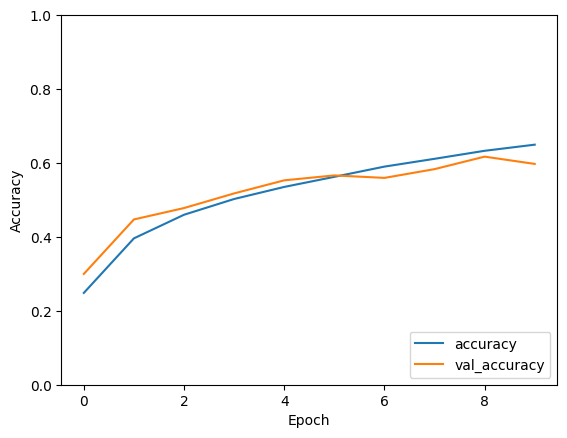

313/313 - 1s - 3ms/step - accuracy: 0.5974 - loss: 1.1410

Test accuracy: 0.5974000096321106

Test accuracy: 1.1410335302352905
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[ 0.9748846  -4.0731564   0.41475916  3.1194584  -1.3744435   2.5051506
 -0.3241864  -1.5801803   0.99599195 -1.5800242 ]
[3]


In [ ]:
plt.plot(huan_luyen.history['accuracy'], label='accuracy')
plt.plot(huan_luyen.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Đánh giá mô hình trên tập kiểm tra
# verbose là mức độ hiển thị thông tin

test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest accuracy:', test_loss)

# Dự đoán trên một ảnh trong tập kiểm tra
predictions = model.predict(test_img)
print(predictions[0])
# In nhãn dự đoán
print(test_labels[0])


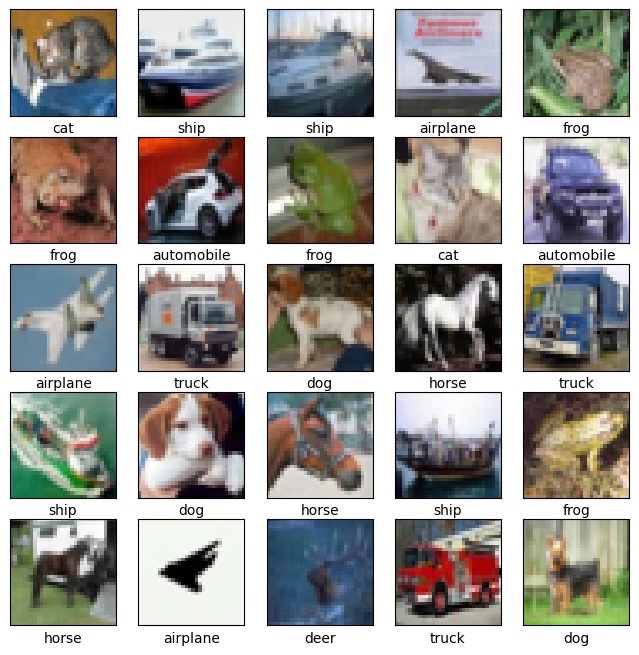

In [20]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i])
    plt.xlabel(y[test_labels[i][0]])
plt.show()

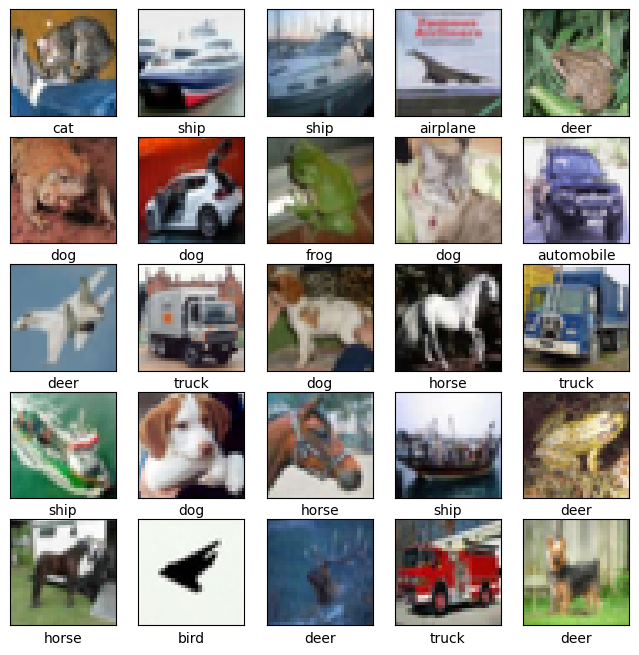

In [23]:
# In ra hinh ảnh và nhãn dự đoán
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i])
    plt.xlabel(y[predictions[i].argmax()])
plt.show()